Import packages

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib.patches import Rectangle
import os

import warnings
warnings.filterwarnings("ignore")

Upload datasets and preprocessing

In [4]:
Data = pd.read_csv('/home/yuxin/home/yuxin/INT303Project/cardio_train_cleaned.csv')

In [5]:
Data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,55,1,156,85.0,140,90,3,1,0,0,1,1
1,51,1,165,64.0,130,70,3,1,0,0,0,1
2,48,2,169,82.0,150,100,1,1,0,0,1,1
3,61,2,178,95.0,130,90,3,3,0,0,1,1
4,63,1,158,90.0,145,85,2,2,0,0,1,1


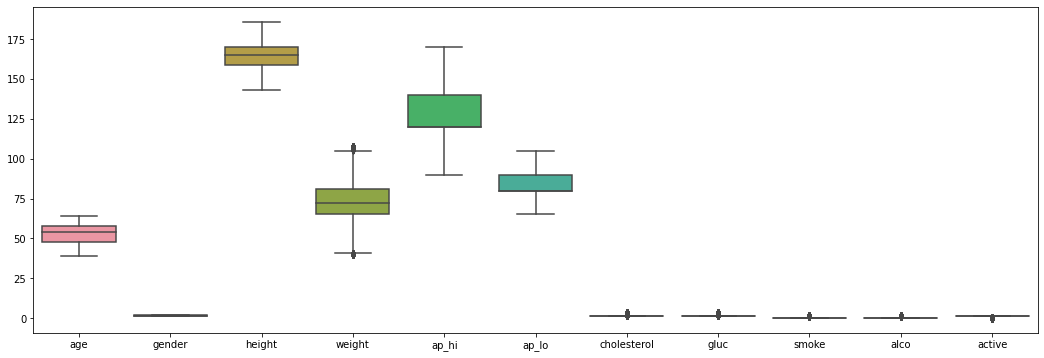

In [6]:
fig = plt.figure(figsize=(18,6))
sns.boxplot(data=Data.drop(['cardio'],axis=1))

fig.savefig('/home/yuxin/home/yuxin/INT303Project/outliers.png')

In [7]:
Data = pd.read_csv('/home/yuxin/home/yuxin/INT303Project/cardio_train_cleaned.csv')
Data['BMI'] = Data['weight']/((Data['height']/100)**2)
Data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
count,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000,61740.000000
mean,52.929835,1.348397,164.402349,73.209379,126.483657,81.722838,1.359410,1.221607,0.086476,0.052251,0.804146,0.500000,27.132091
std,6.738831,0.476466,7.529302,12.274496,14.315952,7.685369,0.676592,0.568791,0.281067,0.222535,0.396860,0.500004,4.570486
min,39.000000,1.000000,143.000000,40.000000,90.000000,65.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,13.520822
25%,48.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,23.875115
50%,54.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.500000,26.259585
75%,58.000000,2.000000,170.000000,81.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,29.760863
max,64.000000,2.000000,186.000000,107.000000,170.000000,105.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,50.891795


Explorative data analysis

Gender

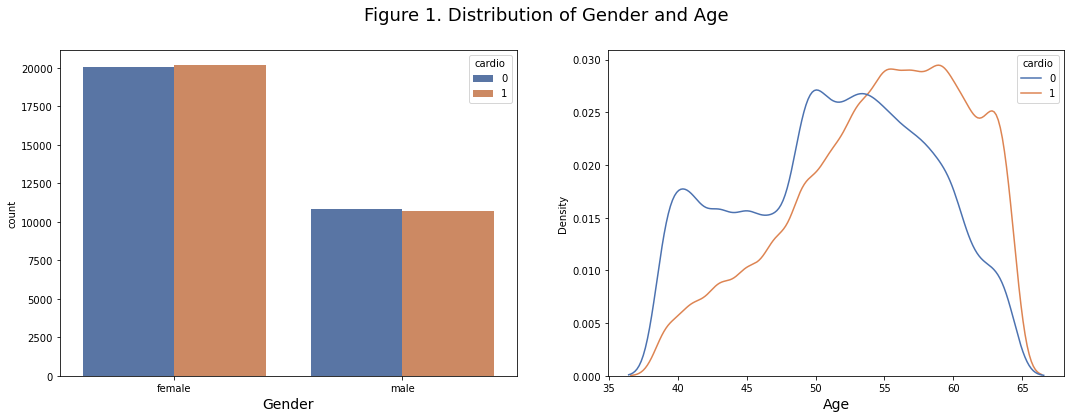

In [8]:
fig = plt.figure(figsize = (18,6))

plt.subplot2grid((1,2),(0,0),colspan=1,rowspan=1)
ax1 = sns.countplot(x='gender', hue='cardio', data = Data, palette="deep")
ax1.set_xticklabels(['female','male'])
ax1.set_xlabel('Gender', size = 14)

plt.subplot2grid((1,2),(0,1),colspan=1,rowspan=1)
ax2 = sns.kdeplot(x='age', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Age', size = 14)

plt.suptitle('Figure 1. Distribution of Gender and Age', size = 18)
plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/gender_bar_age_dist.png')

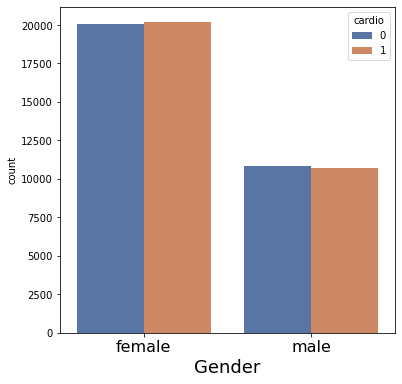

In [9]:
fig = plt.figure(figsize = (6,6))
ax = sns.countplot(x='gender', hue='cardio', data = Data, palette="deep")
ax.set_xticklabels(['female','male'],size = 16)
ax.set_xlabel('Gender', size = 18)
fig.savefig('/home/yuxin/home/yuxin/INT303Project/gender.png')

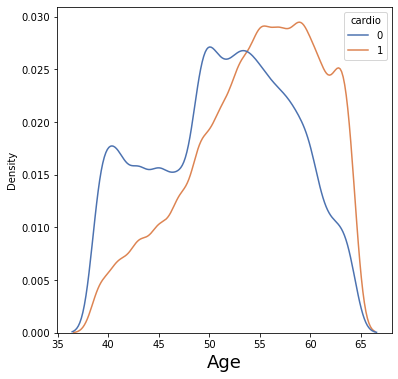

In [10]:
fig = plt.figure(figsize = (6,6))
ax2 = sns.kdeplot(x='age', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Age', size = 18)
fig.savefig('/home/yuxin/home/yuxin/INT303Project/age.png')

BMI

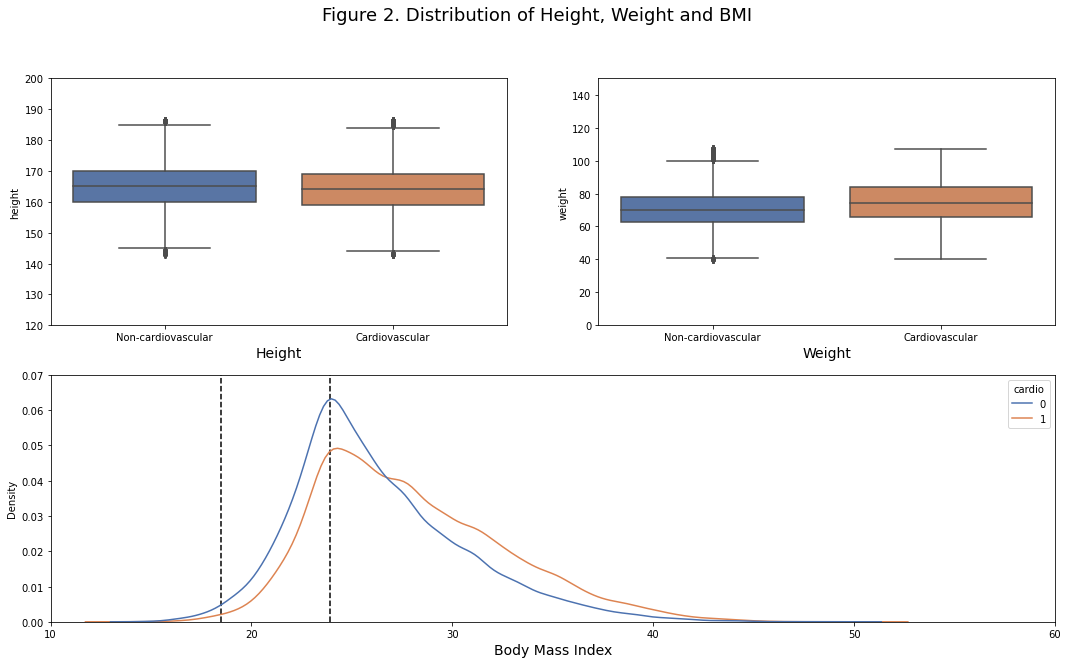

In [11]:
fig = plt.figure(figsize = (18,10))

plt.subplot2grid((2,2),(0,0),colspan=1,rowspan=1)
ax1 = sns.boxplot(x='cardio', y='height', data = Data, palette='deep')
ax1.set_xlabel('Height',size=14)
ax1.set(ylim=(120, 200))
ax1.set_xticklabels(['Non-cardiovascular','Cardiovascular'])

plt.subplot2grid((2,2),(0,1),colspan=1,rowspan=1)
ax2 = sns.boxplot(x='cardio', y='weight', data = Data, palette='deep')
ax2.set_xlabel('Weight', size=14)
ax2.set(ylim=(0, 150))
ax2.set_xticklabels(['Non-cardiovascular','Cardiovascular'])

plt.subplot2grid((2,2),(1,0),colspan=2,rowspan=1)
ax3 = sns.kdeplot(x='BMI', hue='cardio', data = Data, palette='deep')
ax3.set(xlim=(10,60))
ax3.set_xlabel('Body Mass Index',size = 14)
ax3.set(ylim=(0,0.07))
plt.vlines(18.5,0,0.07,colors='black',linestyles='--',linewidth = 1.5)
plt.vlines(23.9,0,0.07,colors='black',linestyles='--',linewidth = 1.5)

plt.suptitle('Figure 2. Distribution of Height, Weight and BMI', size = 18)
plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/hw_BMI.png')

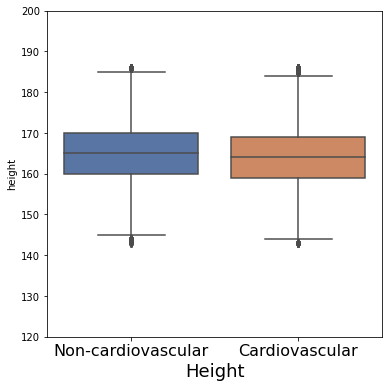

In [12]:
fig = plt.figure(figsize = (6,6))
ax1 = sns.boxplot(x='cardio', y='height', data = Data, palette='deep')
ax1.set_xlabel('Height',size=18)
ax1.set(ylim=(120, 200))
ax1.set_xticklabels(['Non-cardiovascular','Cardiovascular'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/height.png')

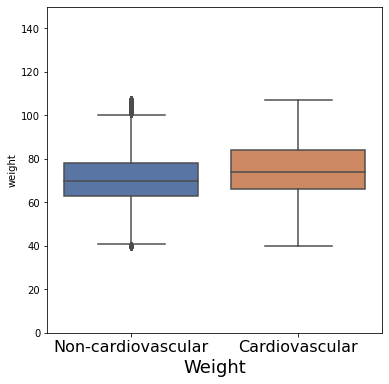

In [13]:
fig = plt.figure(figsize = (6,6))
ax2 = sns.boxplot(x='cardio', y='weight', data = Data, palette='deep')
ax2.set_xlabel('Weight', size=18)
ax2.set(ylim=(0, 150))
ax2.set_xticklabels(['Non-cardiovascular','Cardiovascular'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/weight.png')

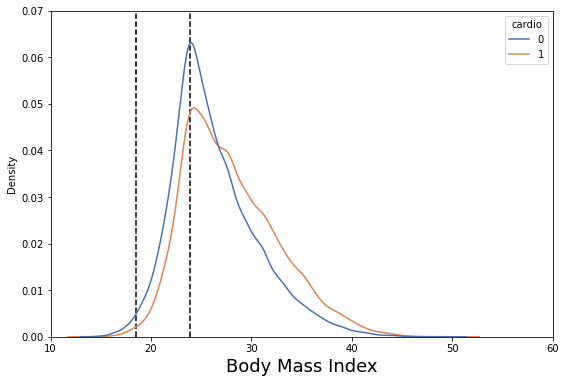

In [14]:
fig = plt.figure(figsize = (9,6))

ax3 = sns.kdeplot(x='BMI', hue='cardio', data = Data, palette='deep')
ax3.set(xlim=(10,60))
ax3.set_xlabel('Body Mass Index',size = 18)
ax3.set(ylim=(0,0.07))
plt.vlines(18.5,0,0.07,colors='black',linestyles='--',linewidth = 1.5)
plt.vlines(23.9,0,0.07,colors='black',linestyles='--',linewidth = 1.5)
fig.savefig('/home/yuxin/home/yuxin/INT303Project/BMI.png')

Cholestrol + Glucose

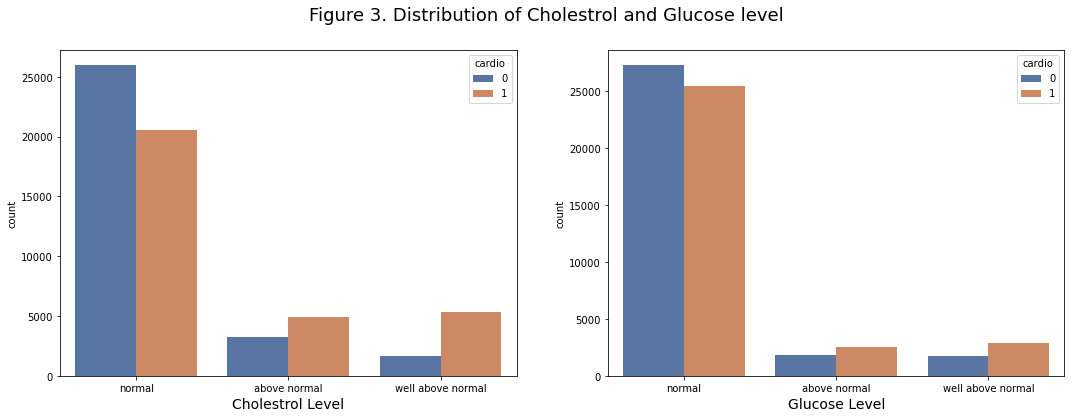

In [15]:
fig = plt.figure(figsize = (18,6))

plt.subplot2grid((1,2),(0,0),colspan=1,rowspan=1)
ax1 = sns.countplot(x='cholesterol', hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Cholestrol Level',size=14)
ax1.set_xticklabels(['normal','above normal','well above normal'])

plt.subplot2grid((1,2),(0,1),colspan=1,rowspan=1)
ax2 = sns.countplot(x='gluc', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Glucose Level',size=14)
ax2.set_xticklabels(['normal','above normal','well above normal'])

fig.suptitle('Figure 3. Distribution of Cholestrol and Glucose level', size = 18)

plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/cg_bar.png')

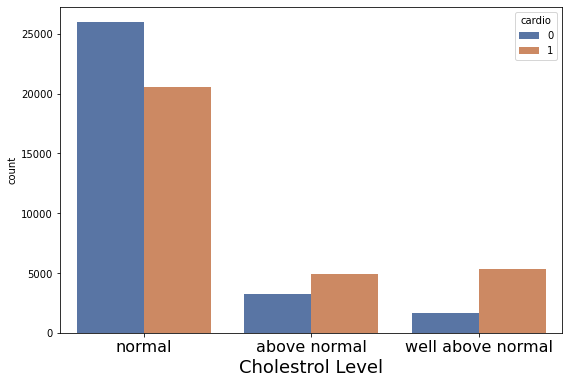

In [16]:
fig = plt.figure(figsize = (9,6))
ax1 = sns.countplot(x='cholesterol', hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Cholestrol Level',size=18)
ax1.set_xticklabels(['normal','above normal','well above normal'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/cholestrol.png')

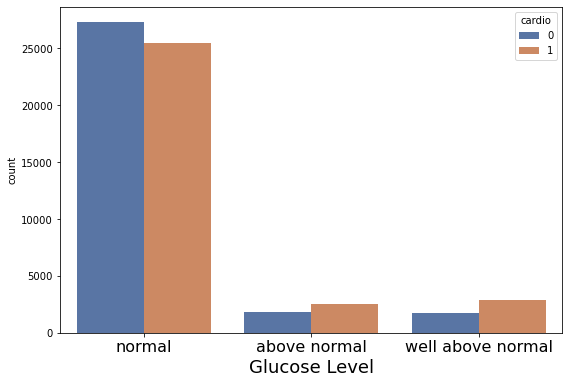

In [17]:
fig = plt.figure(figsize = (9,6))
ax2 = sns.countplot(x='gluc', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Glucose Level',size=18)
ax2.set_xticklabels(['normal','above normal','well above normal'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/glucose.png')

Smoke, Alcohol and Exercise

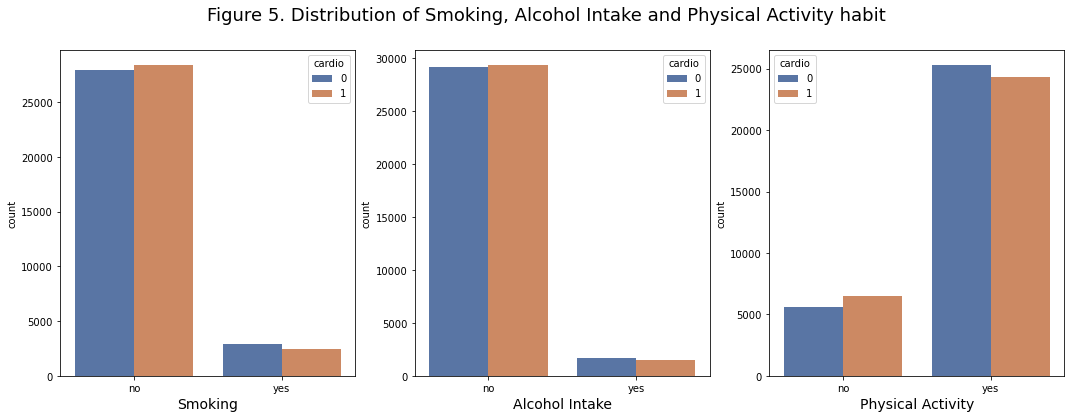

In [18]:
fig = plt.figure(figsize = (18,6))

plt.subplot2grid((1,3),(0,0),colspan=1,rowspan=1)
ax1 = sns.countplot(x='smoke', hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Smoking',size = 14)
ax1.set_xticklabels(['no','yes'])

plt.subplot2grid((1,3),(0,1),colspan=1,rowspan=1)
ax2 = sns.countplot(x='alco', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Alcohol Intake',size = 14)
ax2.set_xticklabels(['no','yes'])

plt.subplot2grid((1,3),(0,2),colspan=1,rowspan=1)
ax3 = sns.countplot(x='active', hue='cardio', data = Data, palette="deep")
ax3.set_xlabel('Physical Activity',size = 14)
ax3.set_xticklabels(['no','yes'])

fig.suptitle('Figure 5. Distribution of Smoking, Alcohol Intake and Physical Activity habit',size = 18)

plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/SDE_bar.png')

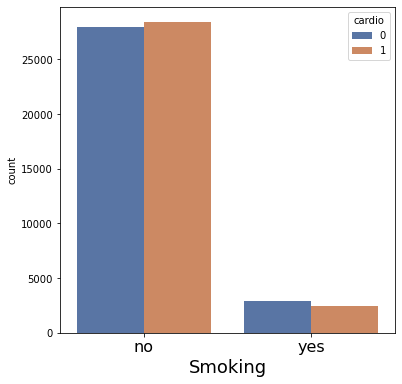

In [19]:
fig = plt.figure(figsize = (6,6))
ax1 = sns.countplot(x='smoke', hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Smoking',size = 18)
ax1.set_xticklabels(['no','yes'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/smoking.png')

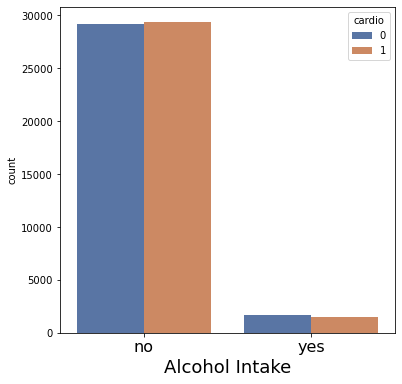

In [20]:
fig = plt.figure(figsize = (6,6))
ax2 = sns.countplot(x='alco', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Alcohol Intake',size = 18)
ax2.set_xticklabels(['no','yes'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/alcohol.png')

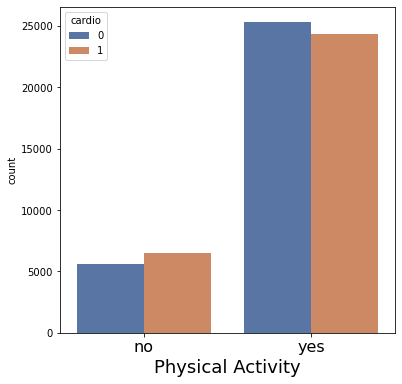

In [21]:
fig = plt.figure(figsize = (6,6))
ax3 = sns.countplot(x='active', hue='cardio', data = Data, palette="deep")
ax3.set_xlabel('Physical Activity',size = 18)
ax3.set_xticklabels(['no','yes'],size = 16)

fig.savefig('/home/yuxin/home/yuxin/INT303Project/exercise.png')

ap_hi and ap_lo

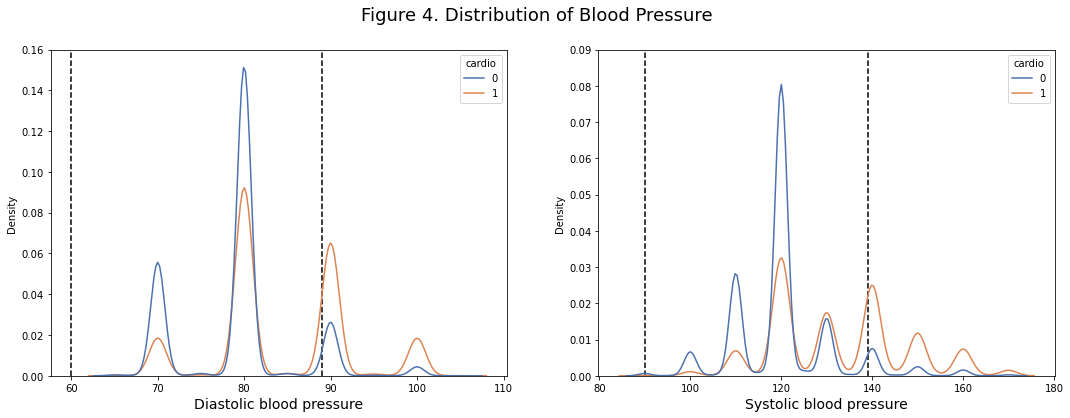

In [22]:
fig = plt.figure(figsize = (18,6))

plt.subplot2grid((1,2),(0,0),colspan=1,rowspan=1)
ax1 = sns.kdeplot(x='ap_lo',hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Diastolic blood pressure',size = 14)
plt.vlines(60,0,0.16,colors='black',linestyles='--',linewidth = 1.5)
plt.vlines(89,0,0.16,colors='black',linestyles='--',linewidth = 1.5)
ax1.set(ylim=(0,0.16))

plt.subplot2grid((1,2),(0,1),colspan=1,rowspan=1)
ax2 = sns.kdeplot(x='ap_hi', hue='cardio', data = Data, palette="deep")
ax2.set_xlabel('Systolic blood pressure',size = 14)
plt.vlines(90,0,0.09,colors='black',linestyles='--',linewidth = 1.5)
plt.vlines(139,0,0.09,colors='black',linestyles='--',linewidth = 1.5)
ax2.set(ylim=(0,0.09))

fig.suptitle('Figure 4. Distribution of Blood Pressure',size = 18)
plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/blood_density.png')

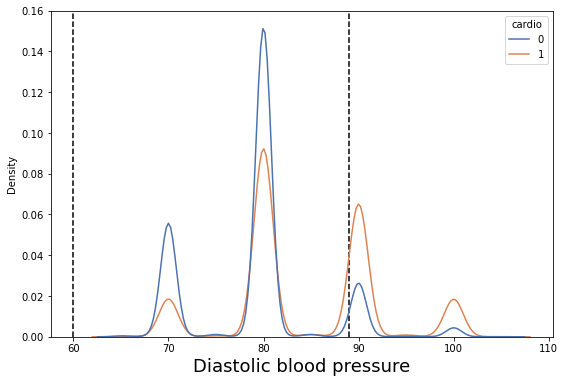

In [23]:
fig = plt.figure(figsize = (9,6))

ax1 = sns.kdeplot(x='ap_lo',hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Diastolic blood pressure',size = 18)
plt.vlines(60,0,0.16,colors='black',linestyles='--',linewidth = 1.5)
plt.vlines(89,0,0.16,colors='black',linestyles='--',linewidth = 1.5)
ax1.set(ylim=(0,0.16))

fig.savefig('/home/yuxin/home/yuxin/INT303Project/diastolic.png')

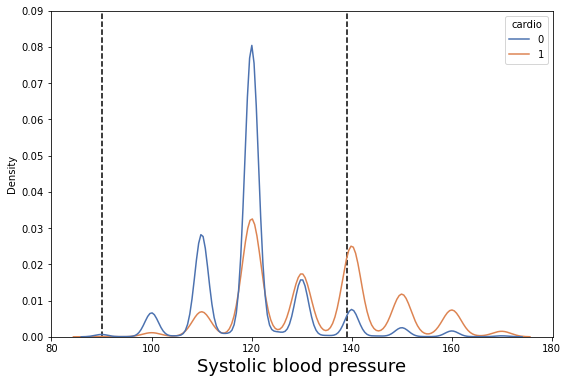

In [24]:
fig = plt.figure(figsize = (9,6))

ax1 = sns.kdeplot(x='ap_hi',hue='cardio', data = Data, palette="deep")
ax1.set_xlabel('Systolic blood pressure',size = 18)
plt.vlines(90,0,0.09,colors='black',linestyles='--',linewidth = 1.5)
plt.vlines(139,0,0.09,colors='black',linestyles='--',linewidth = 1.5)
ax1.set(ylim=(0,0.09))
fig.savefig('/home/yuxin/home/yuxin/INT303Project/sysstolic.png')

Correlation analysis

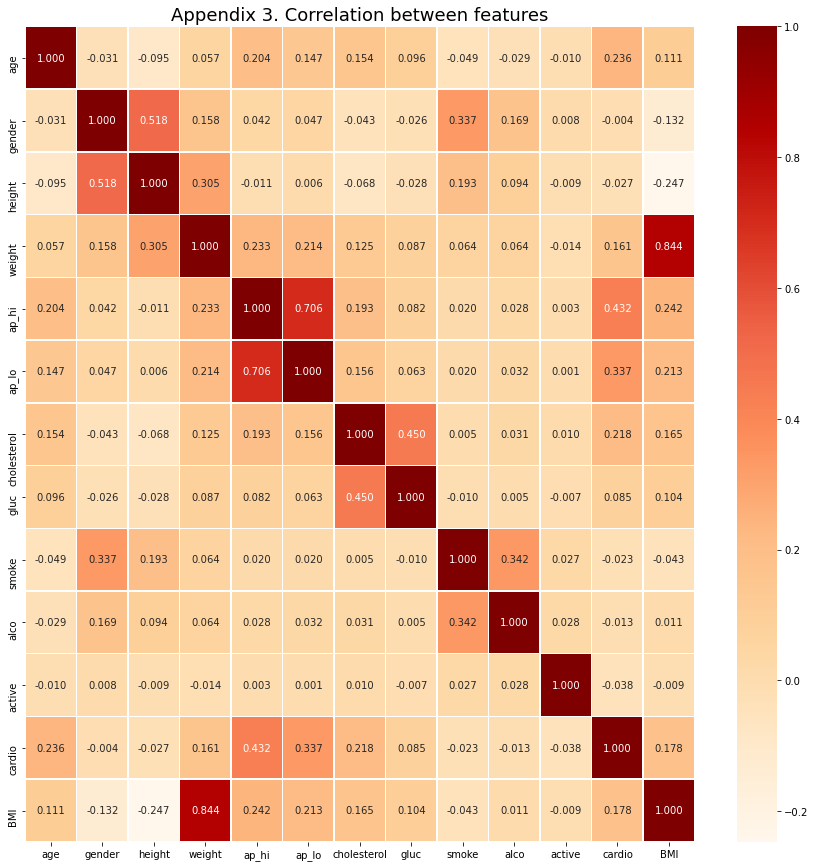

In [25]:
corr = Data.corr()

fig = plt.figure(figsize = (15,15))
ax = sns.heatmap(corr, annot=True, fmt=".3f", linewidths=0.5,cmap="OrRd")
ax.set_title('Appendix 3. Correlation between features',size=18)

plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/corr_heap.png')

Data cleaning

Missing value

In [2]:
Data = Data.dropna()

NameError: name 'Data' is not defined

Outliers

Predictive data analysis

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier

from xgboost import plot_importance
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
# from sklearn.feature_selection import SelectKBest,chi2
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,roc_curve,roc_auc_score

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [26]:
X_train, X_test, y_train, y_test = train_test_split(Data.drop(['cardio'],axis=1), Data['cardio'])

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

SVM

In [28]:
svm_model = SVC()
svm_model.fit(X_train,y_train)

test_pred = svm_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.726077097505669

LogisticRegression

In [29]:
lr_model = LogisticRegression()
lr_model.fit(X_train,y_train)

test_pred = lr_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.7212180110139293

Decision tree

In [30]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

test_pred = dt_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.6327178490443797

Random Forest

In [31]:
rf_model = RandomForestClassifier()
rf_model.fit(X_train,y_train)

test_pred = rf_model.predict(X_test)
accuracy_score(y_test,test_pred)

0.7035957240038873

K nearest neighbor

In [32]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

test_pred = knn_model.predict(X_test)
accuracy_score(y_test, test_pred)

0.685131195335277

xgboost

In [33]:
xgb_model = XGBClassifier()
xgb_model.fit(Data.drop(['cardio'],axis=1), Data['cardio'])

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

<Figure size 432x288 with 0 Axes>

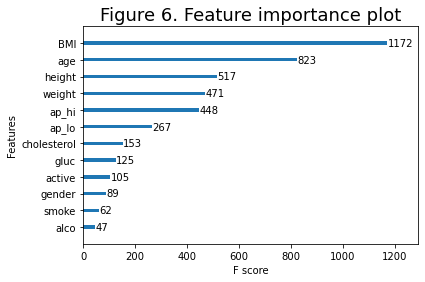

In [34]:
fig = plt.figure()

ax = plot_importance(xgb_model,grid=False)
ax.set_title('Figure 6. Feature importance plot',size = 18)

plt.show()
ax.figure.savefig('/home/yuxin/home/yuxin/INT303Project/importance_plot.png')

Neural network

In [35]:
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"  # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

In [36]:
nn_model = Sequential([
    Dense(256, activation='relu', input_shape=[X_train.shape[1]]),
    Dense(128, activation='relu'),
    Dense(1),
])
nn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = nn_model.fit(X_train, y_train, validation_split=0.2, epochs=20)

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Train on 37044 samples, validate on 9261 samples
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/20
37044/37044 [==============================] - 3s 86us/sample - loss: 0.7062 - acc: 0.6854 - val_loss: 0.6267 - val_acc: 0.6428
Epoch 2/20
37044/37044 [==============================] - 3s 89us/sample - loss: 0.6631 - acc: 0.6848 - val_loss: 0.6109 - val_acc: 0.6994
Epoch 3/20
37044/37044 [==============================] - 3s 94us/sample - loss: 0.5919 - acc: 0.7162 - val_loss: 0.5823 - val_acc: 0.7172
Epoch 4/20
37044/37044 [==============================] - 4s 99us/sample - loss: 0.5883 - acc: 0.7185 - val_loss: 0.5688 - val_acc: 0.7223
Epoch 5/20
37044/37044 [==============================] - 4s 98us/sample - loss: 0.5817 - acc: 0.7192 - val_loss: 0.5887 - val_acc: 0.7202
Epoch 6/20
37044/37044 [====================

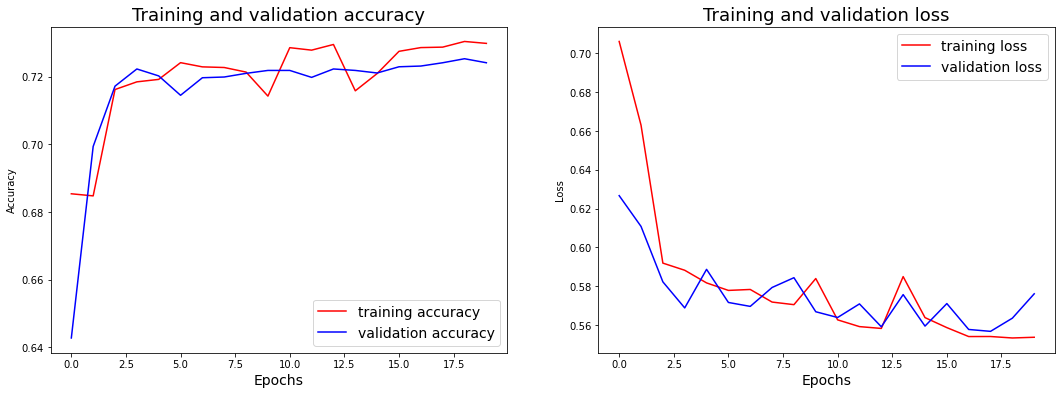

In [37]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = history.epoch

fig = plt.figure(figsize=(18,6))

plt.subplot2grid((1,2),(0,0),colspan=1,rowspan=1)
plt.plot(epochs, acc, 'r', label='training accuracy')
plt.plot(epochs, val_acc, 'b', label='validation accuracy')
plt.title('Training and validation accuracy', size=18)
plt.xlabel('Epochs', size=14)
plt.ylabel('Accuracy')
plt.legend(prop={'size': 14})

plt.subplot2grid((1,2),(0,1),colspan=1,rowspan=1)
plt.plot(epochs, loss, 'r', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.title('Training and validation loss', size=18)
plt.xlabel('Epochs', size=14)
plt.ylabel('Loss')
plt.legend(prop={'size': 14})

plt.show()


fig.savefig('/home/yuxin/home/yuxin/INT303Project/al_line.png')

Measurement

ROC curve

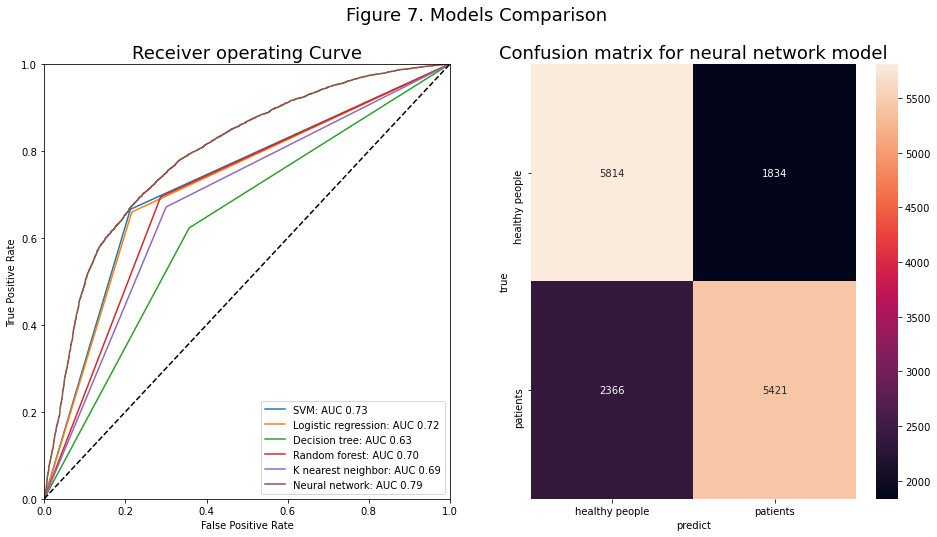

In [38]:
fig = plt.figure(figsize = (16,8))

plt.subplot2grid((1,2),(0,0),colspan=1,rowspan=1)
svm_pred = svm_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test, svm_pred)
auc = roc_auc_score(y_test, svm_pred)
plt.plot(fpr,tpr,label='SVM: AUC %0.2f' % auc, lw = 1.5)

lr_pred = lr_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,lr_pred)
auc = roc_auc_score(y_test, lr_pred)
plt.plot(fpr,tpr,label='Logistic regression: AUC %0.2f' % auc, lw = 1.5)

dt_pred = dt_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,dt_pred)
auc = roc_auc_score(y_test, dt_pred)
plt.plot(fpr,tpr,label='Decision tree: AUC %0.2f' % auc, lw = 1.5)

rf_pred = rf_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,rf_pred)
auc = roc_auc_score(y_test,rf_pred)
plt.plot(fpr,tpr,label='Random forest: AUC %0.2f' % auc, lw = 1.5)

knn_pred = knn_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,knn_pred)
auc = roc_auc_score(y_test, knn_pred)
plt.plot(fpr,tpr,label='K nearest neighbor: AUC %0.2f' % auc, lw = 1.5)

nn_pred = nn_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,nn_pred)
auc = roc_auc_score(y_test, nn_pred)
plt.plot(fpr,tpr,label='Neural network: AUC %0.2f' % auc, lw = 1.5)

plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve', size = 18)
plt.legend(loc="lower right")

plt.subplot2grid((1,2),(0,1),colspan=1,rowspan=1)
cm = confusion_matrix(y_test, nn_model.predict_classes(X_test))
ax1 = sns.heatmap(cm,annot=True,fmt='.20g',xticklabels = ['healthy people','patients'] , yticklabels = ['healthy people','patients'])
ax1.set_title('Confusion matrix for neural network model',size = 18)
ax1.set_xlabel('predict')
ax1.set_ylabel('true')

plt.suptitle('Figure 7. Models Comparison',size = 18)
plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/rocs_cm.png')

Confusion matrix

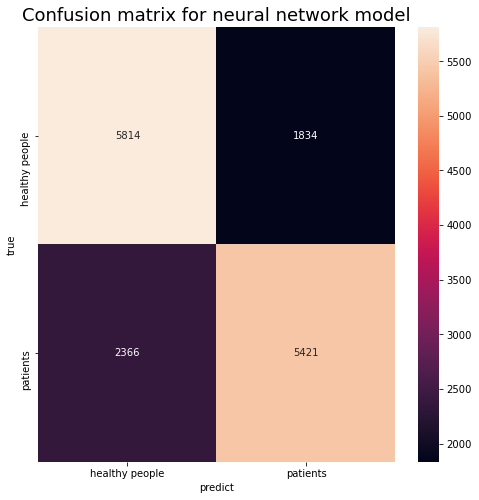

In [39]:
cm = confusion_matrix(y_test, nn_model.predict_classes(X_test))

fig = plt.figure(figsize = (8,8))

ax1 = sns.heatmap(cm,annot=True,fmt='.20g',xticklabels = ['healthy people','patients'] , yticklabels = ['healthy people','patients'])
ax1.set_title('Confusion matrix for neural network model',size = 18)
ax1.set_xlabel('predict')
ax1.set_ylabel('true')

plt.show()

fig.savefig('/home/yuxin/home/yuxin/INT303Project/confusion.png')

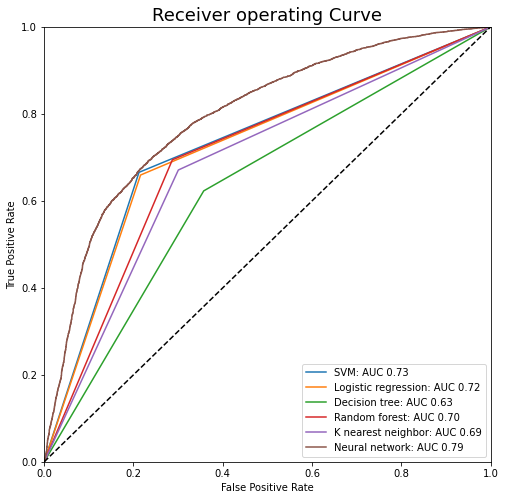

In [40]:
fig = plt.figure(figsize = (8,8))

svm_pred = svm_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test, svm_pred)
auc = roc_auc_score(y_test, svm_pred)
plt.plot(fpr,tpr,label='SVM: AUC %0.2f' % auc, lw = 1.5)

lr_pred = lr_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,lr_pred)
auc = roc_auc_score(y_test, lr_pred)
plt.plot(fpr,tpr,label='Logistic regression: AUC %0.2f' % auc, lw = 1.5)

dt_pred = dt_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,dt_pred)
auc = roc_auc_score(y_test, dt_pred)
plt.plot(fpr,tpr,label='Decision tree: AUC %0.2f' % auc, lw = 1.5)

rf_pred = rf_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,rf_pred)
auc = roc_auc_score(y_test,rf_pred)
plt.plot(fpr,tpr,label='Random forest: AUC %0.2f' % auc, lw = 1.5)

knn_pred = knn_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,knn_pred)
auc = roc_auc_score(y_test, knn_pred)
plt.plot(fpr,tpr,label='K nearest neighbor: AUC %0.2f' % auc, lw = 1.5)

nn_pred = nn_model.predict(X_test)
fpr,tpr,thresh = roc_curve(y_test,nn_pred)
auc = roc_auc_score(y_test, nn_pred)
plt.plot(fpr,tpr,label='Neural network: AUC %0.2f' % auc, lw = 1.5)

plt.plot([0, 1], [0, 1], color='black', lw=1.5, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating Curve', size = 18)
plt.legend(loc="lower right")

fig.savefig('/home/yuxin/home/yuxin/INT303Project/rocs.png')